__Author: Sayemul Islam (ECE dept., Temple University)__

Voltage (Pk-Pk) = 966.796875mV
Wall time: 4.93 s


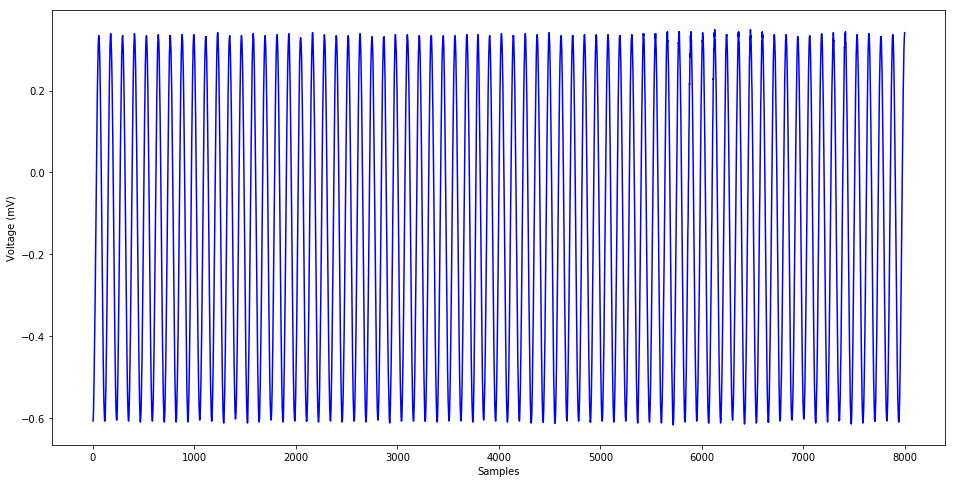

In [1]:
%%time

# Good for measuring up to 50Hz to 10KHz and +/- 5V Vp-p voltage

import matplotlib.pyplot as plt
from matplotlib.mlab import find
%matplotlib inline
import numpy as np
import nidaqmx

Samples = 8000 # 2500 Samples to read

with nidaqmx.Task() as task:
    task.ai_channels.add_ai_voltage_chan("Dev1/ai0")
    p = task.read(number_of_samples_per_channel=Samples)
    i = np.arange(1,(Samples+1))
    # print(p)
    pk_pk = max(p)-min(p)
    
    
plt.figure(figsize=(16,8))
line1 = plt.plot(i,p,'-b',label='Voltage')
plt.xlabel('Samples')
plt.ylabel('Voltage (mV)')

print('Voltage (Pk-Pk) = ' + str(pk_pk*1000) + 'mV')

In [2]:
fs = 113120 # Where did I get this? I don't know
sig = np.asarray(p)

def freq_zero_crossing(sig, fs):
    """
    Frequency estimation from zero crossing method
    sig - input signal
    fs - sampling rate
    
    return: 
    dominant period
    """
    # Find the indices where there's a crossing
    indices = find((sig[1:] >= 0) & (sig[:-1] < 0))

    # Let's calculate the real crossings by interpolate
    crossings = [i - sig[i] / (sig[i+1] - sig[i]) for i in indices]
    
    # Let's get the time between each crossing
    # the diff function will get how many samples between each crossing
    # we divide the sampling rate to get the time between them
    delta_t = np.diff(crossings) / fs
    
    # Get the mean value for the period
    period = np.mean(delta_t)
    
    return period

period_from_zero_crossing = freq_zero_crossing(sig, fs)
print('Period is %.15f seconds'%(period_from_zero_crossing))
print('Frequency is %.15f Hz'%((1/period_from_zero_crossing)))

Period is 0.001032523157778 seconds
Frequency is 968.501280060435647 Hz


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  
